Dwiferdio Seagal Putra (1301154323)

### Import Library
Import seluruh library yang dibutuhkan seperti sckit-image, scikit-learn, pandas, numpy, matplotlib, os, dan glob

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import os
import glob
%matplotlib inline

### Load Dataset
Load dataset pada folder data yang berada pada satu folder dengan notebook ini. Dataset yang digunakan yaitu dataset buah yang mempunyai 7 kelas yaitu apple, banana, lemon, lime, orange, peach, dan pear.

In [3]:
def load_dataset(path):
    dataset = []
    label = []
    directory = glob.glob(os.path.join(path, '*'))

    for dir in directory:
        for roots, dirs, files, in os.walk(dir):
            for filename in files:
                if filename.endswith(".png"):
                    name = filename.split(sep='_')
                    image = io.imread(os.path.join(dir, filename))
                    dataset.append(image)
                    label.append(name[0])

    return dataset, label

Load dataset menggunakan fungsi yang telah didefinisikan sebelumnya yaitu load_dataset. Untuk berpindah direktori apabila dataset berada pada folder lain, cukup dengan mengganti variabel path.

In [4]:
path = '../data/'
dataset, label = load_dataset(path)

Lakukan konversi python list ke dalam numpy array. Keuntungan dari konversi tersebut adalah dapat mengeksekusi fungsi-fungsi yang telah disediakan oleh numpy terkait array.

In [5]:
dataset = np.array(dataset)
label = np.array(label)

Salah satu fungsi untuk mengetahui ukuran dari suatu array yaitu np.shape.

In [6]:
dataset.shape

(21287,)

In [7]:
label.shape

(21287,)

### Count dataset per label
Hitung keseluruhan dataset untuk setiap labelnya. Hasil perhitungan disimpan dan ditampilkan pada pandas DataFrame untuk mengetahui berapa banyak data gambar sesuai dengan labelnya.

In [8]:
df = {}
count_apple = 0
count_banana = 0
count_lemon = 0
count_lime = 0
count_orange = 0
count_peach = 0 
count_pear = 0
for i in range(len(dataset)):
    if label[i] == 'apple':
        count_apple = count_apple + 1
        df['apple'] = count_apple
    elif label[i] == 'banana':
        count_banana = count_banana + 1
        df['banana'] = count_banana
    elif label[i] == 'lemon':
        count_lemon = count_lemon + 1
        df['lemon'] = count_lemon
    elif label[i] == 'lime':
        count_lime = count_lime + 1
        df['lime'] = count_lime
    elif label[i] == 'orange':
        count_orange = count_orange + 1
        df['orange'] = count_orange
    elif label[i] == 'peach':
        count_peach = count_peach + 1
        df['peach'] = count_peach
    elif label[i] == 'pear':
        count_pear = count_pear + 1
        df['pear'] = count_pear        
df = pd.DataFrame(df, index=['count'])
df.transpose()

,count
apple,3098
banana,2826
lemon,3747
lime,2514
orange,2834
peach,2082
pear,4186


### Show image in dataset array

Tampilkan gambar untuk masing-masing label.

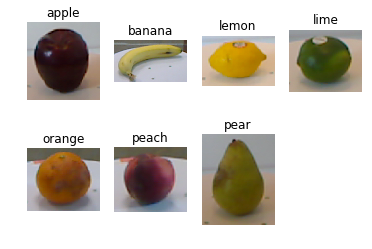

In [9]:
plt.subplot(241).set_title("apple")
plt.axis("off")
plt.imshow(dataset[0])
plt.subplot(242).set_title("banana")
plt.axis("off")
plt.imshow(dataset[3098])
plt.subplot(243).set_title("lemon")
plt.axis("off")
plt.imshow(dataset[5924])
plt.subplot(244).set_title("lime")
plt.axis("off")
plt.imshow(dataset[9671])
plt.subplot(245).set_title("orange")
plt.axis("off")
plt.imshow(dataset[12185])
plt.subplot(246).set_title("peach")
plt.axis("off")
plt.imshow(dataset[15019])
plt.subplot(247).set_title("pear")
plt.axis("off")
plt.imshow(dataset[17101])
plt.show()

### Shuffle Dataset

Acak dataset dengan labelnya agar classifer dapat melakukan proses learning dengan lebih dari 1 label. Jika tidak diacak, kemungkinan classifier hanya akan mempelajari data dari 1 label saja.

In [10]:
shuffle_index = np.random.permutation(21287)
dataset, label = dataset[shuffle_index], label[shuffle_index]

### Image Descriptor
Ekstraksi ciri dilakukan untuk mendapatkan ciri tertentu dari suatu gambar. Ekstraksi ciri yang pertama menggunakan HoG yaitu Histogram of Gradient. HoG melakukan ekstraksi ciri dan menghasilkan ciri dari bentuk gambar tersebut. Sebelum melakukan ekstraksi ciri, gambar dipreprocessing terlebih dahulu. Hasil preprocessing tersebut berupa gambar yang berukuran 72x72 dan berwarna keabuan.

In [11]:
def preprocessing(image):
    # convert image to grayscale
    gray_image = rgb2gray(image)
    # resize image into 72x72 pixels
    gray_image = resize(gray_image, (72, 72))
    return gray_image

Definisikan modifikasi dari fungsi HoG dengan parameter-parameter yang telah ditentukan.

In [12]:
def extract_using_hog(image):
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), 
                        cells_per_block=(1, 1), visualize=True, multichannel=False)
    return fd, hog_image

Preprocessing gambar.

In [24]:
data_grey = []
for j in range(len(dataset)):
    data_prep = preprocessing(dataset[j])
    data_grey.append(data_prep)

/Users/seagalputra/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/seagalputra/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [25]:
data_grey = np.asarray(data_grey)

Tampilkan salah satu gambar dari hasil preprocessing.

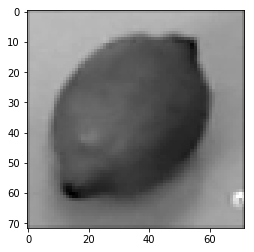

In [26]:
plt.imshow(data_grey[0], cmap=plt.cm.gray)
plt.show()

Setelah dilakukan preprocessing, gambar diekstraksi cirinya dengan menggunakan HoG.

In [27]:
fd = []
hog_image = []
for k in range(len(data_grey)):
    temp, temp_image = extract_using_hog(data_grey[k])
    fd.append(temp)
    hog_image.append(temp_image)

/Users/seagalputra/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [28]:
fd = np.asarray(fd)
hog_image = np.asarray(hog_image)

Tampilkan salah satu gambar hasil ekstraksi ciri.

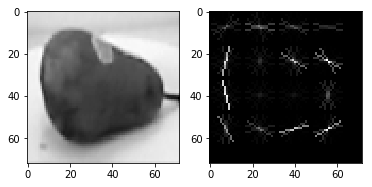

In [29]:
plt.subplot(121)
plt.imshow(data_grey[100], cmap=plt.cm.gray)
plt.subplot(122)
plt.imshow(hog_image[100], cmap=plt.cm.gray)
plt.show()

### Classify Image
Hasil ekstraksi ciri tersebut lalu diklasifikasikan menggunakan classifier. Salah satu classifier yang digunakan yaitu kNN. Sebelum proses klasifikasi dilakukan, pisahkan dataset menjadi 2 bagian yaitu data train dan test.

In [30]:
data_train, data_test, label_train, label_test = fd[:20000], fd[20000:], label[:20000], label[20000:]

Definisikan classifier dengan menentukan parameter-parameter tertentu untuk mendapatkan hasil yang maksimal.

In [31]:
clf = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)
clf.fit(data_train, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='distance')

Lakukan prediksi dari proses training menggunakan kNN.

In [32]:
predict = clf.predict(data_test)

Hitung skor dari hasil prediksi dengan label testing.

In [33]:
score = accuracy_score(label_test, predict) * 100
print("Akurasi: %s persen" %score)

Akurasi: 100.0 persen


Tampilkan 5 gambar pertama hasil dari klasifikasi.

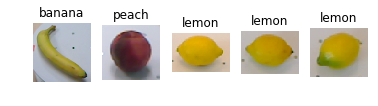

In [34]:
plt.subplot(151).set_title(predict[1286])
plt.imshow(dataset[21286])
plt.axis("off")
plt.subplot(152).set_title(predict[1285])
plt.imshow(dataset[21285])
plt.axis("off")
plt.subplot(153).set_title(predict[1284])
plt.imshow(dataset[21284])
plt.axis("off")
plt.subplot(154).set_title(predict[1283])
plt.imshow(dataset[21283])
plt.axis("off")
plt.subplot(155).set_title(predict[1282])
plt.imshow(dataset[21282])
plt.axis("off")
plt.show()